# Module 2 Summative Lab

## Introduction

For today's section, we're going to work on a single big lab to apply everything we've learned in Mod 2!

## About This Lab

A quick note before getting started--this lab isn't like other labs you seen so far. This lab is meant to take ~8 hours to complete, so it's much longer and more challenging than the average labs you've seen so far. If you feel like this lab is challenging or that you might be struggling a bit, don't fret--that's by design! With everything we've learned about Web Scraping, APIs, and Databases, the best way to test our knowledge of it is to build something substantial! 

## The Project

In this lab, we're going to make use of everything we've learned about APIs, databases, and Object-Oriented Programming to **_Extract, Transform, and Load_** (or **_ETL_**, for short) some data from a SQL database into a MongoDB Database. 

You'll find a database containing information about soccer teams and the matches they've played in the file `database.sqlite`. For this project, our goal is to get the data we think is important from this SQL database, do some calculations and data transformation, and then store everything in a MongoDB database. 

Let's get into the specifics of this project.

### The Goal

Start by examining the data dictionary for the SQL database we'll be working with, which comes from this [kaggle page](https://www.kaggle.com/laudanum/footballdelphi).  Familiarize yourself with the tables it contains, and what each column means. We'll be using this database to get data on each soccer team, calculate some summary statistics, and then store each in a MongoDB database. 

Upon completion of this lab, each unique team in this dataset should have a record in the MongoDB instance containing the following information:

* The name of the team
* The total number of goals scored by the team during the 2011 season
* The total number of wins the team earned during the 2011 season
* A histogram visualization of the team's wins and losses for the 2011 season (store the visualization directly by assigning it to a variable)
* The team's win percentage on days where it was raining during games in the 2011 season. 

#### Getting the Weather Data

Note that for this last calculation, you'll need to figure out if it was raining or not during the game. The database itself does not contain this information, but it does contain the date on which the game was played. For this, you'll need to use the [DarkSky API](https://darksky.net/dev) to get the historical weather data for that day. Note that each game is played in a different location, and this information is not contained in our SQL database. However, the teams in this database are largely german, so go ahead and just use the weather in Berlin, Germany as a proxy for this information. If it was raining in Berlin on the day the game was played, count that as rain game--**_you do not need to try and figure out the actual weather at each game's location, because we don't have that information!_**

#### NOTE: The DarkSky API is limited to 1000 free API calls a day, so be sure to test your model on very small samples. Otherwise, you'll hit the rate limit!

## Project Architecture

Unlike previous labs, this lab is more open-ended, and will require you to make design decisions and plan out your strategy for building a system with this many working parts. However, **_using Object-Oriented Programming is a requirement for this project--you must create at least 2 separate, well-structured classes in your solution!_** Although it may seem easier to "just start coding", this is a classic beginner's mistake. Instead, think about separating out the different functionalities you'll need to reach your goal, and then build classes to handle each. For instance, at a minimum, you'll need to:

* Query the SQL database
* Calculate summary statistics
* Get the weather data from the DarkSky API
* Load the data into MongoDB

We **_strongly recommend_** you consider creating separate classes for handling at least some of these tasks.  Be sure to plan the inputs, outputs, and methods for each class before you begin coding! 

**_NOTE:_** We have provided some empty classes below. You are welcome to delete them and use a different architecture for this project if you so choose.  You do not have to use each of them, they are just there to give you an idea of what sorts of classes you may want to consider using.

### Rapid Prototyping and Refactoring

It's totally okay to try to get a task working without using OOP. For instance, when experimenting with the DarkSky API for getting historical weather data, it makes sense to just write the code in the cells and rapidly iterate until you get it all working. However, once you get it working, you're not done--you should then **_Refactor_** your code into functions or classes to make your code more modular, reusable, understandable, and maintainable! 

In short--do what you need to do to get each separate piece of functionality working, and then refactor it into a class after you've figured it out!

### Some Final Advice

You haven't built anything this big or complex thus far, so you may not yet fully realize how much trial and error goes into it. If your code keeps breaking, resist the urge to get frustrated, and just keep working. Software development is an iterative process!  No one writes perfect code that works the first time for something this involved. You're going to run into _a lot_ of small errors in this project, right up until the point where it just works, and then you're done! However, you can reduce these errors by planning out your code, and thinking about how all of the pieces fit together before you begin coding. Once you have some basic understanding of how it all will work, then you'll know what you need to build, and then all that is left is to build it!

In short:

* Plan ahead--you'll thank yourself later!
* Errors and broken code aren't bad, they're normal. 
* Keep working, and stay confident--you can do this!

Good luck--we look forward to seeing your completed project!

# Restating Goal: 

Upon completion of this lab, *each unique team* in this dataset should have a record in the MongoDB instance containing the following information:
<ol>
    
  * The name of the team
  * The total number of goals scored by the team during the 2011 season
  * The total number of wins the team earned during the 2011 season 
  * A histogram visualization of the team's wins and losses for the 2011 season (store the visualization directly by assigning it to a variable)
  * The team's win percentage on days where it was raining during games in the 2011 season.  </ol>

## Workplan  :

### * Query the SQL database  https://www.kaggle.com/laudanum/footballdelphi
    Get: 
        * Team Name
        * Goals Scored (2011)
        * Number of Wins (2011)
        * Dates (for use for weather)
        
### * Calculate summary statistics
    Calc:
        * Total Goals Scored (2011) (sum)
        * Total Number of Wins (2011) (sum)
    Group By
        * Team Name
### * Get the weather data from the DarkSky API  https://darksky.net/dev  
    Class WeatherGetter to obtain weather for Berlin, Germany containing 'rain' corresponding to dates when games were played. Use this data to calc %wins when raining.
### * Load the data into MongoDB
    Class: MongoHandler to: load team into MongoDB
        




## Import Libraries

In [112]:
import sqlite3
import pandas as pd
import bs4 as BeautifulSoup
import numpy as np
import requests
import pymongo
import time
import matplotlib.pyplot as plt
import json

## OBTAIN First dataset:

In [2]:
conn = sqlite3.connect('''database.sqlite''')
c = conn.cursor()

In [4]:
c.execute('''select * from matches where season = 2011''')

matches = pd.DataFrame(c.fetchall())
matches.columns = [i[0] for i in c.description]
matches.head()

,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,1092,D1,2011,2012-03-31,Nurnberg,Bayern Munich,0,1,A
1,1093,D1,2011,2011-12-11,Stuttgart,Bayern Munich,1,2,A
2,1094,D1,2011,2011-08-13,Wolfsburg,Bayern Munich,0,1,A
3,1095,D1,2011,2011-11-27,Mainz,Bayern Munich,3,2,H
4,1096,D1,2011,2012-02-18,Freiburg,Bayern Munich,0,0,D


In [5]:
gamedates = [x for x in matches['Date'].unique()]
len(gamedates)


165

In [6]:
type(gamedates)

list

In [7]:
display(matches)

,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,1092,D1,2011,2012-03-31,Nurnberg,Bayern Munich,0,1,A
1,1093,D1,2011,2011-12-11,Stuttgart,Bayern Munich,1,2,A
2,1094,D1,2011,2011-08-13,Wolfsburg,Bayern Munich,0,1,A
3,1095,D1,2011,2011-11-27,Mainz,Bayern Munich,3,2,H
4,1096,D1,2011,2012-02-18,Freiburg,Bayern Munich,0,0,D
...,...,...,...,...,...,...,...,...,...
987,44870,E0,2011,2012-05-13,Sunderland,Man United,0,1,A
988,44871,E0,2011,2012-05-13,Swansea,Liverpool,1,0,H
989,44872,E0,2011,2012-05-13,Tottenham,Fulham,2,0,H
990,44873,E0,2011,2012-05-13,West Brom,Arsenal,2,3,A


In [8]:
matches['Match_ID'].nunique()

992

In [9]:
len(matches)

992

In [9]:
    #def maketeam(self, df):
       # ht = list(df['HomeTeam'].unique())
        #at = list(df['AwayTeam'].unique())
        #len(ht)==len(at)

        ## Make list of teams
        #ht.extend(at)
        #team_list = list(set(ht))
    

In [10]:
#display(newdf)

## Get weather


In [10]:
#https://api.darksky.net/forecast/[key]/[latitude],[longitude],[time]
def get_keys(path):
    with open(path) as f:
        return json.load(f)

keys = get_keys("/Users/aosika/.secret/ds_api.json")

api_key = keys['api_key']

In [11]:
type(api_key)

str

In [12]:
response = requests.get(f"https://api.darksky.net/forecast/{api_key}/52.5200,13.4050,20120331?exclude=currently,minutely,hourly,alerts,flags")


In [13]:
test_date = matches['Date'][0]
test_date

'2012-03-31'

In [14]:
import requests
def api_request(time,verbose=1):
    # request_url = "https://api.darksky.net/forecast/[key]/[latitude],[longitude],[time]"
    lat =52.5200
    long= 13.4050

    time_suffix = "T12:00:00"
    check_date = time+time_suffix

    template_url= f"https://api.darksky.net/forecast/{api_key}/{lat},{long},{check_date}?exclude=currently,minutely,hourly,alerts,flags"
    if verbose==2:
        print(template_url)
    
    response = requests.get(template_url )
    
    if response.status_code == 200:
        if verbose>0: 
            print('Success')
    else: 
        print(f"Error: status code = {response.status_code}")
    
    return response

In [16]:
#api_request(test_date, verbose=2)

In [17]:
#resp = api_request(test_date,verbose=2)

In [18]:
#resp.json()

In [19]:
#r_dict = resp.json()
#r_dict.keys()

In [17]:

class WeatherGetter():
    
    def __init__(self,api_key, lat =52.5200, long= 13.4050,):
        """Sets the lat/long for the location, and stores api_key."""
        self.lat= lat
        self.long=long
        self.base_url  = "https://api.darksky.net/forecast/"
        self.api_key = api_key
        
    
    def get_weather_for_date(self, date,verbose=1):
        """Checks dark_sky api for weather from date. """
        import requests
        # request_url = "https://api.darksky.net/forecast/[key]/[latitude],[longitude],[time]"

        time_suffix = "T12:00:00"
        check_date = date+time_suffix

        template_url= f"https://api.darksky.net/forecast/{self.api_key}/{self.lat},{self.long},{check_date}?exclude=current,minutely,hourly"
        if verbose==2:
            print(template_url)

        ## Get and check response
        response = requests.get(template_url )
        if response.status_code == 200:
            
            if verbose > 0: 
                print('Success')
        else: 
            print(f"Error: status code = {response.status_code}")
            
        # call helper method
        return self._get_weather_from_response(response)
    
    def _get_weather_from_response(self,response):
        """Extracts pricipProbability from dark_sky api response"""
        r_dict = response.json()
        return r_dict['daily']['data'][0]['precipProbability']
        
        
    def get_weather_for_date_list(self,dates, verbose=0):    
        import time
        weather_list = []
        
        for date in dates:
            time.sleep(0.5)
            weather_list.append(self.get_weather_for_date(date))
            
            
#         self._weather_list     
        return weather_list

In [16]:
wget = WeatherGetter(api_key)
weather_results = wget.get_weather_for_date_list(gamedates)

Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success


In [18]:
len(weather_results)

165

In [19]:
display(weather_results[:10])

[0.92, 0, 0, 0, 0, 0.98, 0, 0, 1, 0.09]

In [20]:
weather_dict = dict(zip(gamedates,weather_results))
weather_dict

{'2012-03-31': 0.92,
 '2011-12-11': 0,
 '2011-08-13': 0,
 '2011-11-27': 0,
 '2012-02-18': 0,
 '2012-01-20': 0.98,
 '2012-02-04': 0,
 '2012-04-21': 0,
 '2011-09-18': 1,
 '2011-10-23': 0.09,
 '2011-10-01': 0,
 '2012-03-03': 0,
 '2011-08-27': 0.09,
 '2012-03-17': 0,
 '2011-11-06': 0.09,
 '2012-05-05': 0.98,
 '2012-04-11': 0,
 '2011-12-17': 1,
 '2012-02-03': 0,
 '2011-10-29': 0,
 '2012-01-22': 0.98,
 '2011-12-03': 0.91,
 '2012-04-14': 0,
 '2012-03-25': 0,
 '2012-03-10': 0,
 '2012-04-07': 0,
 '2011-11-19': 0,
 '2011-10-14': 0,
 '2011-09-24': 0,
 '2012-04-28': 0,
 '2011-12-18': 1,
 '2012-03-02': 0,
 '2012-03-16': 0,
 '2012-02-17': 0.98,
 '2011-08-06': 0.91,
 '2011-11-04': 0,
 '2011-09-16': 0,
 '2011-07-15': 0,
 '2012-05-06': 0.98,
 '2012-02-11': 0,
 '2011-10-02': 0,
 '2012-03-30': 0,
 '2011-10-22': 0,
 '2011-08-26': 0.09,
 '2011-08-07': 0.91,
 '2012-02-24': 0.98,
 '2011-07-17': 1,
 '2012-02-12': 0,
 '2011-08-22': 0,
 '2011-09-09': 0.09,
 '2012-04-01': 0,
 '2011-09-25': 0,
 '2012-04-20': 0,
 

In [21]:
matches['Precip'] = matches['Date'].map(lambda x: weather_dict[x])

In [22]:
matches.head()

,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,Precip
0,1092,D1,2011,2012-03-31,Nurnberg,Bayern Munich,0,1,A,0.92
1,1093,D1,2011,2011-12-11,Stuttgart,Bayern Munich,1,2,A,0.00
2,1094,D1,2011,2011-08-13,Wolfsburg,Bayern Munich,0,1,A,0.00
3,1095,D1,2011,2011-11-27,Mainz,Bayern Munich,3,2,H,0.00
4,1096,D1,2011,2012-02-18,Freiburg,Bayern Munich,0,0,D,0.00


## Pull Stats:

#how can I use this in my current function?

In [ ]:
### this will build a dictionary for each team
## by taking all the uniuque home teams since every team plays at least once at home.
#all_teams = matches['HomeTeam'].unique()
#print("# of Unique Teams: {}".format(len(all_teams)))
teams_data = {}
for team in newdf:
    data = {'total_matches': 0, 
           'total_wins': 0,
           'total_losses': 0,
           'rain_wins': 0,
           'rain_losses1': 0,
           'total_goals': 0}
    teams_data[team] = data
print(len(teams_data))

In [23]:
def teamlist(df):
      
        ht = list(df['HomeTeam'].unique())
        at = list(df['AwayTeam'].unique())
        len(ht)==len(at)

        ## Make list of teams
        ht.extend(at)
        team_list = list(set(ht))
        return team_list

In [24]:
tlist = teamlist(matches)

In [25]:
matches.head()

,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,Precip
0,1092,D1,2011,2012-03-31,Nurnberg,Bayern Munich,0,1,A,0.92
1,1093,D1,2011,2011-12-11,Stuttgart,Bayern Munich,1,2,A,0.00
2,1094,D1,2011,2011-08-13,Wolfsburg,Bayern Munich,0,1,A,0.00
3,1095,D1,2011,2011-11-27,Mainz,Bayern Munich,3,2,H,0.00
4,1096,D1,2011,2012-02-18,Freiburg,Bayern Munich,0,0,D,0.00


In [ ]:
matches['Rain'] = matches['Precip'].apply(lambda x: if x > .5 == )

In [27]:


rain_days = len(matches[matches['Precip'] > .5])


In [28]:
rain_days

220

In [29]:
clear_days = len(matches[matches['Precip']<.5])

In [30]:
clear_days

772

In [31]:
matches.head()

,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,Precip
0,1092,D1,2011,2012-03-31,Nurnberg,Bayern Munich,0,1,A,0.92
1,1093,D1,2011,2011-12-11,Stuttgart,Bayern Munich,1,2,A,0.00
2,1094,D1,2011,2011-08-13,Wolfsburg,Bayern Munich,0,1,A,0.00
3,1095,D1,2011,2011-11-27,Mainz,Bayern Munich,3,2,H,0.00
4,1096,D1,2011,2012-02-18,Freiburg,Bayern Munich,0,0,D,0.00


In [34]:
teamswins = matches[matches['FTR']=='H'].groupby(matches['HomeTeam']).count()

In [35]:
#homewins = df[df['FTR']=='H'].groupby(df['HomeTeam']).count()

NameError: name 'df' is not defined

In [36]:
teamswins.head()

,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,Precip
HomeTeam,,,,,,,,,,
Aachen,4,4,4,4,4,4,4,4,4,4
Arsenal,12,12,12,12,12,12,12,12,12,12
Aston Villa,4,4,4,4,4,4,4,4,4,4
Augsburg,6,6,6,6,6,6,6,6,6,6
Bayern Munich,14,14,14,14,14,14,14,14,14,14


# working on trying to clean this  up!!!

In [142]:
def TeamList(self,df):

    ht = list(df['HomeTeam'].unique())
    at = list(df['AwayTeam'].unique())
    len(ht)==len(at)

    ## Make list of teams
    ht.extend(at)
    team_list = list(set(ht))


   

In [153]:
class Team:
    
    def __init__(self,team,df):
        #self.df = df
        self.team = team
        self.make_team(team,df)
        self.Hist(team,df)
   

    def make_team(self,team,df):
      
            #df=self.df
            self.total_wins = 0
            self.total_loss = 0
            self.total_goals = 0
            self.rain_days = len(df[df['Precip'] > .5])
            self.rain_wins = 0
            self.percent_rainy_wins = (self.rain_wins/self.rain_days)*100

            # get homegames ...maybe use function above instead?
            h_df_team = df.groupby('HomeTeam').get_group(team)
            val_counts = h_df_team['FTR'].value_counts()
            self.total_wins+=val_counts['H'] 
            self.total_goals +=h_df_team['FTHG'].sum()
            self.rain_wins+=sum((h_df_team['FTR'] =='H') & (h_df_team['Precip'] > .5))
            self.total_home_games = len(h_df_team)

            # get away ames 
            a_df_team = df.groupby('AwayTeam').get_group(team)
            val_counts = a_df_team['FTR'].value_counts()
            self.total_wins+=val_counts['A']
            self.total_goals +=a_df_team['FTAG'].sum()
            self.rain_wins+=sum((a_df_team['FTR'] =='A') & (a_df_team['Precip'] > .5))
            self.total_away_games = len(a_df_team)
            
            self.total_games = self.total_home_games + self.total_away_games
            self.total_losses = self.total_games - self.total_wins 
        
   
        
              
    def Hist(self, team, df):
        fig,ax = plt.subplots()
        ax = plt.bar(x=['wins','losses'],height=[self.total_wins,self.total_losses])
        self.hist = "histograms/"+self.team+".png"
        fig.savefig(self.hist)
            
            





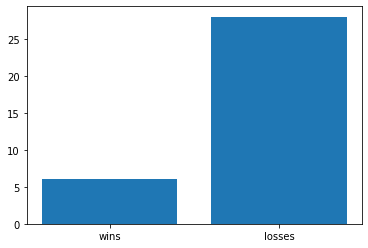

In [154]:
team = Team('Aachen', matches)

In [74]:
type(team)

__main__.Team

In [105]:
team.total_goals

30

In [70]:
team = Team(matches, tlist)

In [113]:
class Team():
    def __init__(self,df):
        self.df = df
        self.team_list = team_list
        self.total_wins = total_wins
        self.total_goals = total_goals
        self.percent_rain_wins = percent_rain_wins
       

    def MakeTeam(self, df):        
        
        #hometeams and away teams
        ht = list(df['HomeTeam'].unique())
        at = list(df['AwayTeam'].unique())
        len(ht)==len(at)

        ## Make list of teams
        ht.extend(at)
        team_list = list(set(ht))
           
        total_wins = 0
        total_losses = 0
        total_goals = 0
        rain_days = 0
        rain_wins = 0
        percent_rain_wins = (rain_wins/rain_days)*100

        # get homegames 
        df_team = df.groupby('HomeTeam').get_group(team)
        val_counts = df_team['FTR'].value_counts()
        total_wins+=val_counts['H'] 
        total_losses += val_counts['A']
        total_goals +=df_team['FTHG'].sum()
        if df_team['Precip'] > .5:
            rain_days += 1
        elif df_team['FTR'] == 'H' & df_team['Precip'] >.5:
            rain_wins +=1
        else:
            pass

        # get away games 
        df_team = df.groupby('Awayteam').get_group(team)
        val_counts = df_team['FTR'].value_counts()
        total_wins+=val_counts['A']
        total_losses+=val_counts['H']
        total_goals +=df_team['FTAG'].sum()
        if df_team['Precip'] > .5:
            rain_days +=1
        elif df_team['FTR'] == 'A' & df_team['Precip'] >.5:
            rain_wins +=1
        else:
            pass
        
        
        teamstats = pd.DataFrame(MakeTeam)
        pd.columns = [team, total_wins, total_goals, rainy_days, rain_wins, percent_rainy_wins]
        
        return teamstats
        
            
        
    def Hist(self,df):
        fig,ax = plt.subplots()
        ax = plt.bar(x=['wins','losses'],height=[self.total_wins,self.total_losses])
        self.hist = "histograms/"+self.name+".png"
        fig.savefig(self.hist)





In [35]:
newdf = MakeTeam(matches)
len(newdf)

NameError: name 'MakeTeam' is not defined

In [ ]:
type(newdf)

## Push to Mongo:

In [ ]:
class MongoHandler(team):
    pass

# Summary

In this lab, we dug deep and used everything we've learned so far about python programming, databases, HTTP requests and API calls to ETL data from a SQL database into a MongoDB instance!

## Figure out how to fix this:

make_team(matches)

In [ ]:
### another idea:

def TeamStats(self,df):
    self.homegoals = homegoals
    self.awaygoals = awaygoals
    self.totalgoals = totalgoals
    self.homewins = homewins
    self.awaywins = awaywins
    self.totalwins = totalwins
    self.rainwins = rainwins
    
    homegoals = df['FTHG'].sum()
    awaygoals = df['FTAG'].sum()
    totalgoals = homegoals + awaygoals

    homewins = df['HomeTeam'] & df['FTG'] == 'H'
    awaywins = df['AwayTeam'] & df['FTG'] == 'A'
    rainwins = df['HomeTeam] & df['FTG'] df['Precip'] > .5 
    

In [ ]:
###khans example 

class Team:
    def __init__(self,name,df):
        
        self.name = name
        self.tally_home(name,df)
        self.tally_away(name,df)
        self.rain_tally()
        
        self.all_matches = self.home_matches + self.away_matches
        self.all_goals = self.home_goals + self.away_goals
        self.all_wins = self.home_wins + self.away_wins
        self.all_losses = self.all_matches - self.all_wins
        self.rainy_win_percentage = (self.rainy_wins/self.rainy_days) * 100        
        
        self.histogram()
    def tally_home(self,name,df):
        home_matches_df = df[df['HomeTeam'] == name]        
        
        self.home_matches = len(home_matches_df)
        self.home_goals = home_matches_df['FTHG'].sum()
        self.home_wins = sum(home_matches_df['FTR'] == 'H')
        
        self.home_rainy_days = sum(home_matches_df['Precip'] >.5 )
        self.home_rain_wins = sum((home_matches_df['FTR'] == 'H') & (home_matches_df['Precip'] > .5 ))
            
    def tally_away(self,name,df):
        
        away_matches_df = df[df['AwayTeam'] == name]        
        
        self.away_matches = len(away_matches_df)
        self.away_goals = away_matches_df['FTAG'].sum()
        self.away_wins = sum(away_matches_df['FTR'] == 'A')
        
        self.away_rainy_days = sum(away_matches_df['Precip'] > .5)
        self.away_rain_wins = sum((away_matches_df['FTR'] == 'A') & (away_matches_df['Precip'] >.5 ))
    
    def rain_tally(self):
        
        self.rainy_days = self.home_rainy_days + self.away_rainy_days
        self.rainy_wins = self.home_rain_wins + self.away_rain_wins
    def histogram(self):
        fig,ax = plt.subplots()
        ax = plt.bar(x=['wins','losses'],height=[self.all_wins,self.all_losses])
        self.hist = "histograms/"+self.name+".png"
        fig.savefig(self.hist)

In [ ]:
##probs not using but saving 

In [63]:
def CalcHomeWins(df):
    
    total_wins = 0
    total_losses = 0
    total_goals = 0
    rain_days = len(df[df['Precip'] > .5])
    rain_wins = 0
    percent_rain_wins = (rain_wins/rain_days)*100

    df_team = df.groupby('HomeTeam')
    val_counts = df_team['FTR'].value_counts()
    total_wins+=val_counts['H'] 
    total_losses += val_counts['A']
    total_goals +=df_team['FTHG'].sum()
    if df_team['FTR'] == 'H' & df[df['Precip'] >.5]:
        rain_wins +=1
    else:
        pass

In [50]:
def HomeWins(df):

        total_goals = sum(df[df['FTHG']])
        total_wins = count(df[df['FTR'] == 'H'])
        rain_wins = count(df[df['FTR'] == 'H']) & df[df['Precip']>.5]
        return print(total_goals, total_wins, rain_wins)